The **Least Square Method** is a fundamental **tool in numerical analysis and data fitting**, widely used across fields like statistics, engineering, machine learning, and economics. Its main **purpose** is to **find the best-fitting solution to a system of equations**, especially when the system is **overdetermined**-meaning that there are more equations than unknowns. 

**Goal**: Finding one line that represents an overdetermined system

**Jacobi and Gauss-Seidel** can not solve this

Minimizing the sum we are minimizing the vertical distances between each point.

In [1]:
import numpy as np
# Data points
X = np.array([1, 2, 3, 4, 5])
Y = np.array([1.2, 2.8, 3.6, 4.5, 5.1])

# Stack the design matrix with a column of ones (for the intercept)
A = np.vstack([X, np.ones(len(X))]).T

print("X:")
print (X)

print("Y:")
print (Y)

print("A:")
print (A)

X:
[1 2 3 4 5]
Y:
[1.2 2.8 3.6 4.5 5.1]
A:
[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]


In [2]:
# Solve using least squares
m, c = np.linalg.lstsq(A, Y, rcond=None)[0]
print(f"Slope: {m}, Intercept: {c}")

Slope: 0.9500000000000001, Intercept: 0.5900000000000001


# Challenge: Play with Least Squares
## Plot each data point
## Plot the line y = 0.95*x + 0.59

In [3]:
#plot all of the values of x and y. Then plot the line y

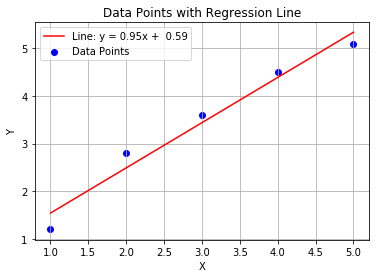

In [5]:
import matplotlib.pyplot as plt

#Data points
X = np.array([1, 2, 3, 4, 5])
Y = np.array([1.2, 2.8, 3.6, 4.5, 5.1])

#Line Parameters:
slope = 0.95
intercept = 0.59

#Generate line values
X_line = np.linspace(max(X), min(X), 100)
Y_line = slope * X_line + intercept

#Plot

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_line, Y_line, color='red', label=f'Line: y = {slope:.2f}x + {intercept: .2f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

# Least Squars w/ Random Data

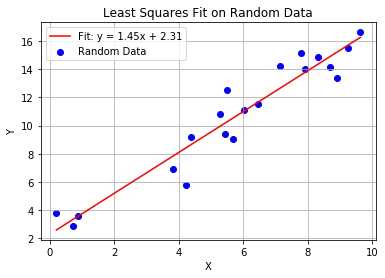

In [6]:
# Most of this is from Copilot: Using this code create one with random x and y values.
# Generate random X and Y
np.random.seed(0)  # for reproducibility
X = np.random.rand(20) * 10        # random X between 0 and 10
X = np.sort(X)                     # sort X as required

# Create Y with some linear relationship + noise
true_slope = 1.5
true_intercept = 2.0
noise = np.random.randn(20) * 1.0  # random noise
Y = true_slope * X + true_intercept + noise

# Least Squares fit
slope, intercept = np.polyfit(X, Y, 1)

# Generate line for plotting
X_line = np.linspace(min(X), max(X), 100)
Y_line = slope * X_line + intercept

# Plot
plt.scatter(X, Y, color='blue', label='Random Data')
plt.plot(X_line, Y_line, color='red',
         label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Least Squares Fit on Random Data')
plt.legend()
plt.grid(True)
plt.show()

# Challenge: Linear Least Squares

True slope/intercept:     m = 1.542555011756435  b = 1.1609734803264744
Estimated slope/intercept: m = 1.9001395431102572  b = 0.9562424298022432

Largest positive residual:
  X = 0.19  Y = 2.390582083998992  Residual = 1.0733131410057999
Largest negative residual:
  X = 0.96  Y = 1.6475669456749702  Residual = -1.1328094455131201


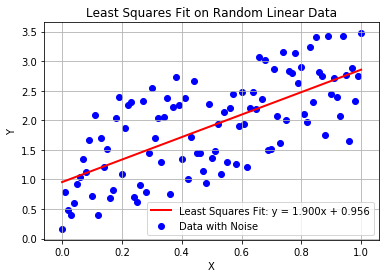

In [7]:
# -----------------------------
# 1. Generate random linear model
# -----------------------------
np.random.seed(1)

m_true = np.random.uniform(0.5, 3.0)     # random slope
b_true = np.random.uniform(-1.0, 2.0)    # random intercept

# X from 0 to 1 in steps of 0.01
X = np.arange(0, 1.01, 0.01)
X = np.sort(X)

# Random noise between -1 and +1
noise = np.random.uniform(-1, 1, len(X))

# True Y with noise
Y = m_true * X + b_true + noise

# -----------------------------
# 2. Least Squares Fit
# -----------------------------
m_fit, b_fit = np.polyfit(X, Y, 1)

# Predicted Y
Y_pred = m_fit * X + b_fit

# -----------------------------
# 3. Residuals
# -----------------------------

residuals = Y - Y_pred

max_res_idx = np.argmax(residuals)
min_res_idx = np.argmin(residuals)

print("True slope/intercept:     m =", m_true, " b =", b_true)
print("Estimated slope/intercept: m =", m_fit, " b =", b_fit)
print()
print("Largest positive residual:")
print("  X =", X[max_res_idx], " Y =", Y[max_res_idx], " Residual =", residuals[max_res_idx])
print("Largest negative residual:")
print("  X =", X[min_res_idx], " Y =", Y[min_res_idx], " Residual =", residuals[min_res_idx])

# -----------------------------
# 4. Plot
# -----------------------------
plt.scatter(X, Y, color='blue', label='Data with Noise')
plt.plot(X, Y_pred, color='red', linewidth=2,
         label=f'Least Squares Fit: y = {m_fit:.3f}x + {b_fit:.3f}')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Least Squares Fit on Random Linear Data")
plt.legend()
plt.grid(True)
plt.show()